In [1]:
#kriti sachan

Heart Disease Prediction Model

Importing the dependencies


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot




Data collection and Processing


In [3]:
#loading the heart_disease_data csv data to a Pandas Dataframe

heart_disease_data = pd. read_csv('/content/heart_cleveland_upload.csv')

In [4]:
#print first 5 rows of the dataset
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
#print last 5 rows of the dataset
heart_disease_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [6]:
#number of rows and columns in the dataset
heart_disease_data.shape

(297, 14)

Visualisation of the given data

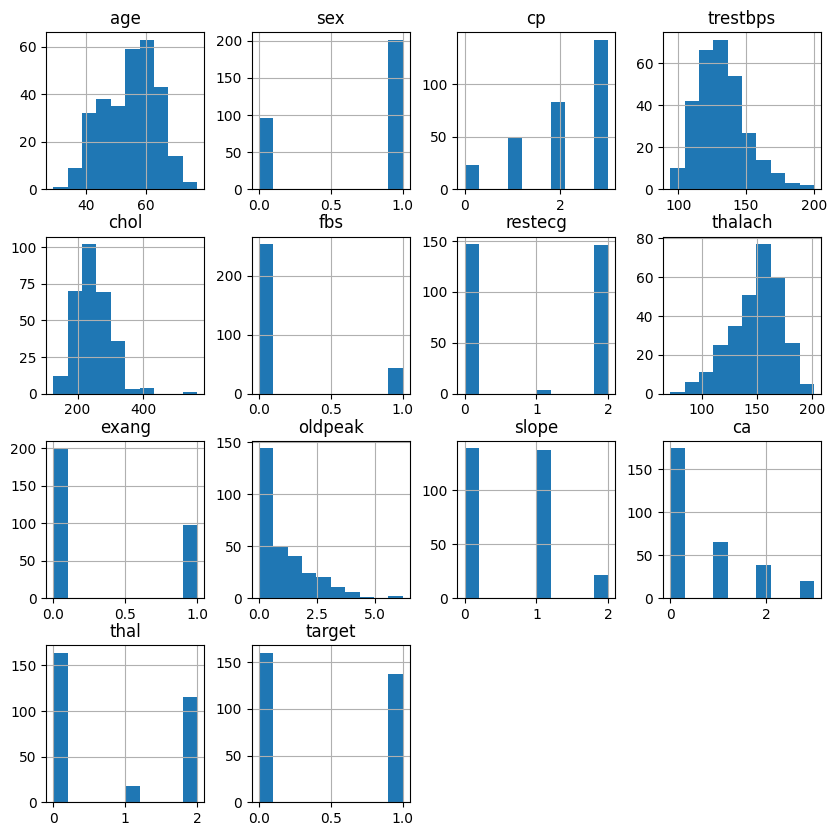

In [7]:
heart_disease_data.hist(figsize=(10,10))
plt.show()

In [8]:
#getting some info about the data
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
#checking for missing values
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

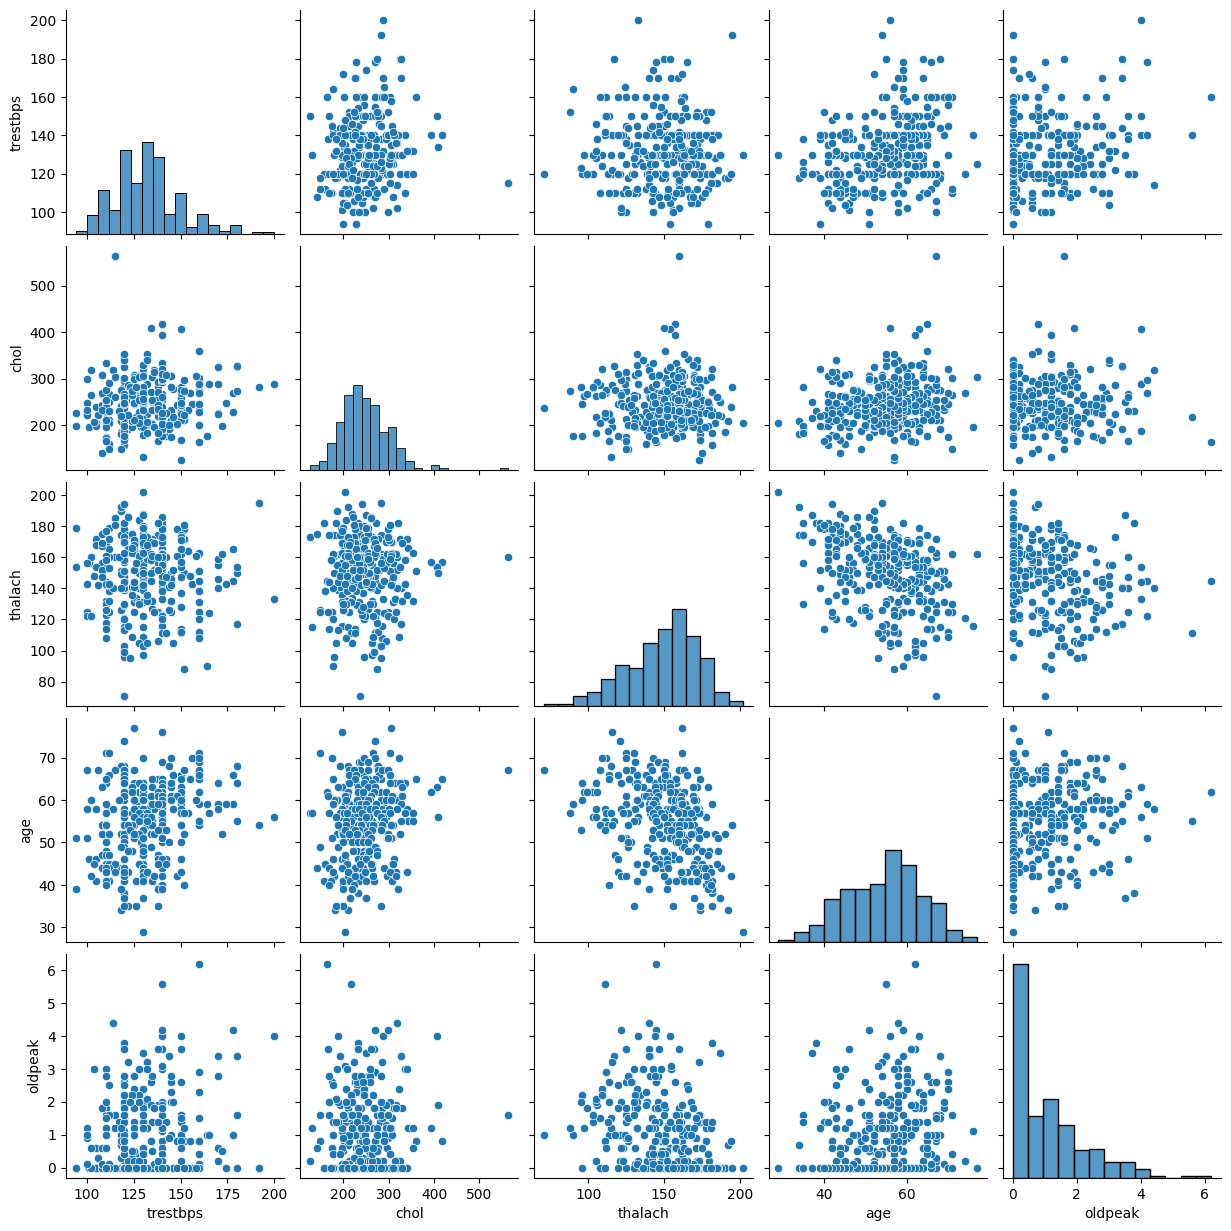

In [10]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(heart_disease_data[numeric_columns])

Visualising the Heat Map

Correlation Matrix

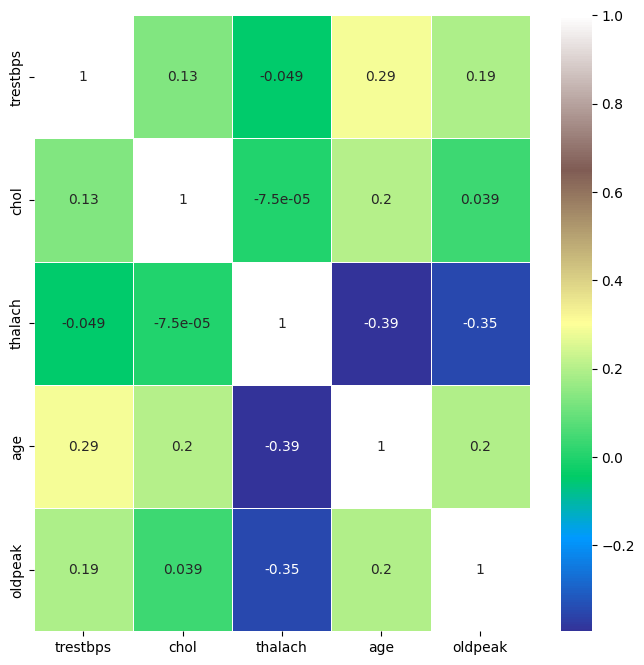

In [11]:
# create a correlation heatmap
sns.heatmap(heart_disease_data[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

creating 4 distinctive plots

<ipython-input-12-a6dd4fcdbb53>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-12-a6dd4fcdbb53>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-12-a6dd4fcdbb53>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

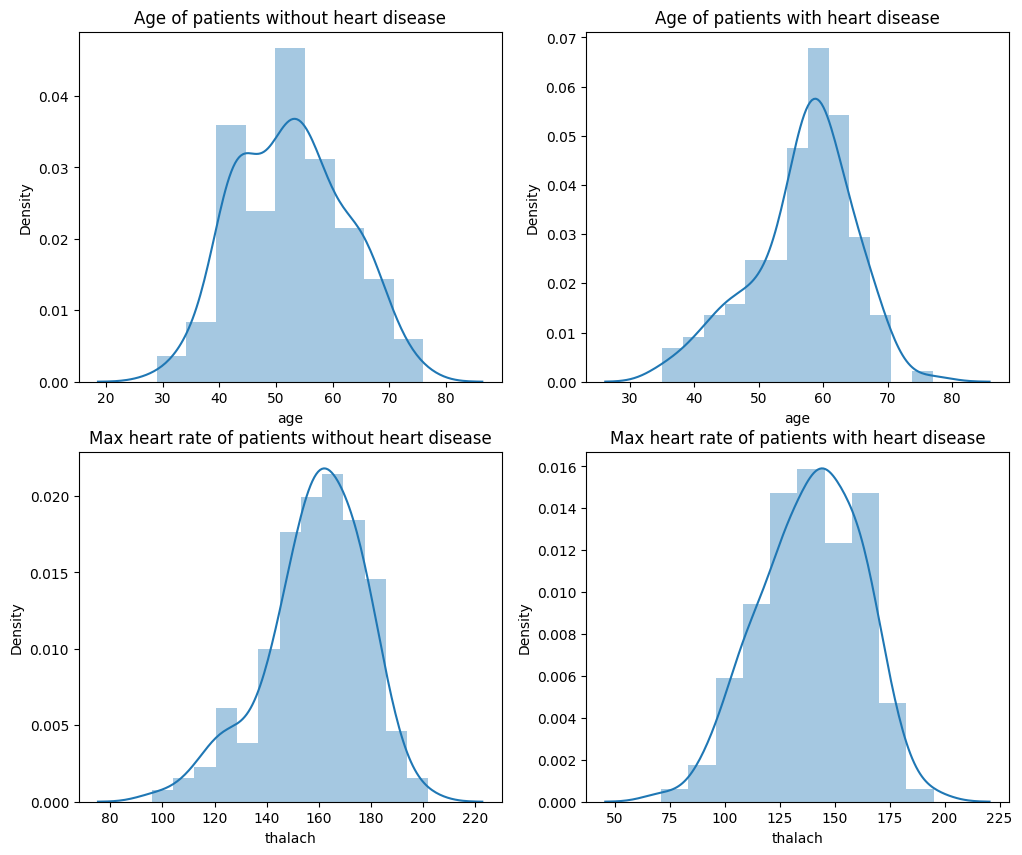

In [12]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart_disease_data[heart_disease_data['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart_disease_data[heart_disease_data['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart_disease_data[heart_disease_data['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart_disease_data[heart_disease_data['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [13]:
#statistical measues of our data
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [14]:
#checking the distribution of target variable
heart_disease_data['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

1 --> defective with heart disease
0 --> healthy with no heart disease

Splitting the Features and Target

In [15]:
X = heart_disease_data.drop(columns='target',axis=1)
Y = heart_disease_data['target']

print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [16]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: target, Length: 297, dtype: int64


Splitting the Data into Training Data and Test Data

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (237, 13) (60, 13)


Model Training


Logistic Regression Model

In [19]:
model = LogisticRegression()

In [20]:
#training the LogisticRegression Model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Model Evaluation  

Accuracy Score

In [21]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [22]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8565400843881856


In [23]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)


In [24]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9


Kneibhours Classification Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(42)

In [26]:
clf1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=42)

In [27]:
clf1.predict(X_test)



array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [28]:
np.array(Y_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [29]:
KNeighborsClassifierScore = clf1.score(X_test,Y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 68.33333333333333


Decision Tree Classsifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [31]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
DecisionTreeClassifierScore = tree.score(X_test,Y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 76.66666666666667


Random Forest Classification model

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [34]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [35]:
model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [36]:
np.array(Y_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [37]:

RandomForestClassifierScore = model.score(X_test,Y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 86.66666666666667


Building a Predictive System

In [38]:
input_data =(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
#change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('the person does not have heart disease')
else:
  print('the person  have a heart disease ')









[0]
the person does not have heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

